<center>
<img src="https://imgs.xkcd.com/comics/convincing.png" height="200"> 

# Андан на экономе: домашнее задание 1
</center>


**ФИО:**

**Интересный факт о себе:**

## Общая информация


__Дата выдачи:__ 18.01.2025

__Мягкий дедлайн:__ 23:59MSK 02.02.2025

__Жесткий дедлайн:__ 23:59MSK 09.02.2025

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-01-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Файл сдаётся в anytask (ссылка на него будет чуть позже в канале курса).

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

# Часть 1: нумпаево-вычислительная

В этом задании мы немного поработаем с `numpy`. За задание можно получить $30$ баллов.

__[10 баллов]__ На паре мы обсудили, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. Давайте немного с этим поработаем.

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [3]:
L = np.array([[1, 0], [10 ** 20, 1]])
U = np.array([[10 ** -20, 1], [0, 1 - 10 ** 20]])
L.dot(U)

array([[1e-20, 1],
       [1.0, 1]], dtype=object)

In [4]:
L_ = np.array([[1., 0], [10 ** 20, 1.]])
U_ = np.array([[10 ** -20, 1.], [0, 1. - 10 ** 20]])
L_.dot(U_)

array([[1e-20, 1.0],
       [1.0, 0.0]], dtype=object)

И какой из них правильный?

> **Ответ:** принимаем любые рассуждения про точность вычислений в питон, какими бы глубокими они не были.

> Во втором случае правый нижний элемент матрицы равен нулю вместо единицы. Это происходит, потому что Python хранит целые числа точно, а дробные хранятся с некоторым приближением. Например, число 0,1:

In [6]:
"{0:.30f}".format(0.1)

'0.100000000000000005551115123126'

>При выполнении арифметической операции Python приводит оба операнда к одному типу. То есть в разности 1,0 - 10^20 у обоих чисел есть "хвост". После вычитания результат округляется вниз и получается

In [7]:
'{0:.30f}'.format(1. - 10 ** 20)

'-100000000000000000000.000000000000000000000000000000'

>Что затем вместе с последующими операциями и округлениями приводит к неверному результату

In [8]:
'{0:.30f}'.format(1. * 10 ** 20 + 1. * (1. - 10 ** 20) )

'0.000000000000000000000000000000'

__[10 баллов]__ Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [9]:
# вариант с циклом
def my_pascal(n):
    pascal_matrix = np.zeros((n, n))
    for i in range(n):
        pascal_matrix[i][0] = 1
        pascal_matrix[0][i] = 1
    for i in range(1, n):
        for j in range(i, n):
            pascal_matrix[i][j] = (i + j) * pascal_matrix[i - 1][j] / i
            if i != j:
                pascal_matrix[j][i] = pascal_matrix[i][j]
    return pascal_matrix

print(my_pascal(6))

[[  1.   1.   1.   1.   1.   1.]
 [  1.   2.   3.   4.   5.   6.]
 [  1.   3.   6.  10.  15.  21.]
 [  1.   4.  10.  20.  35.  56.]
 [  1.   5.  15.  35.  70. 126.]
 [  1.   6.  21.  56. 126. 252.]]


In [10]:
# Вариант без цикла for (за такое накидываем пару бонусных баллов)
from scipy import special
from scipy import linalg


def my_pascal(dim):
	'''
	Мы создали для вас матрицу из нулей размера dim x dim,
	но вы можете ей не пользоваться, если не хотите
	'''
	i = np.tile(np.arange(0, dim), (dim, 1)).transpose()
	j = np.tile(np.arange(0, dim), (dim, 1))
	i_j = i + j
	P = special.comb(i_j, i)
	return P

# проверка
dim = 6
print(my_pascal(dim))

[[  1.   1.   1.   1.   1.   1.]
 [  1.   2.   3.   4.   5.   6.]
 [  1.   3.   6.  10.  15.  21.]
 [  1.   4.  10.  20.  35.  56.]
 [  1.   5.  15.  35.  70. 126.]
 [  1.   6.  21.  56. 126. 252.]]


__[5 баллов]__ ему равен определитель такой матрицы в теории?

**Hint:** вычислите го вам помогут свойства биномиальных коэффициентов :) 

**Ответ:** 

> Тут подойдет любое доказательство. Нет доказательства нет баллов. Ниже мой пример.

>Матрицу Паскаля $S$ можно разложить в произведение матриц $L$ и $U$. $L$ -- нижнетреугольная матрица, в которой ненулевые индексы равны $C^j_{i+j}$ (треугольник Паскаля). $U$ -- верхнетреугольная матрица, равная $L^T$. Элемент $S_{ij}$ результирующей матрицы получается перемножением $i$-ой строки из $L$ на $j$-ый столбец из $U$. Но $i$-ая строка из $L$ -- это $i$-ый столбец из $U$. 
Пусть $i > j$. Тогда $$S_{ij} = \sum_{k=0}^{j} C_j^k C_i^k = C_{i+j}^i.$$

>По свойствам определителя $\det(S) = \det(L) \cdot \det(U)$. Матрицы $L$ и $U$ -- треугольные с единицами на диагонали. Поэтому их определители равны единице. Значит, определитель матрицы Паскаля тоже равен единице.

__[5 баллов]__  А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [11]:
linalg.det(linalg.pascal(30))

-9.922942302743662e+46

In [12]:
linalg.det(my_pascal(30))

1.6290540174420586e+47

Разница заметна невооружённым взглядом! Правда же? 

# Часть 2: пандасо-ирисковая 

В этом задании мы немного поработаем с ценами на акции. За задание можно получить $70$ баллов.

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [13]:
df_prices = pd.read_csv('data/price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [14]:
df_inf = pd.read_csv('data/information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


## 1.1 Разогреваемся

__а) [5 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [15]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.set_index('Date', inplace=True)

__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [16]:
df_inf['NASDAQ'].sum()

103

Сколько ценных бумаг входят во все три индекса сразу?

In [17]:
(df_inf['S&P-500'] &  df_inf['NASDAQ'] &  df_inf['DJI']).sum()

5

В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [18]:
df_sp = df_inf[df_inf['S&P-500']]
((df_sp['Founded'] < 1900)&(df_sp['Founded'] >= 1800)).sum()

95

В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [19]:
df_inf['GICS Sector'].nunique()

11

Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [20]:
len(set(df_prices.columns) - set(df_inf.Symbol))

58

__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

> Тут не уточнено как определить самый крупный сектор. Подойдет любой способ.

In [21]:
sectors = df_inf['GICS Sector'].dropna().value_counts()
sectors = list(sectors[:3].index)

df_sp = df_inf[df_inf['S&P-500']]
df_sp['GICS Sector'].apply(lambda w: w in sectors).sum()

210

__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:__ нет не похоже, да были кризисы. Сильно выделяется 2020 год с ковидом. 

> Тут можно взять любые 5 акций любыми способами, в том числе отобрать вручную.

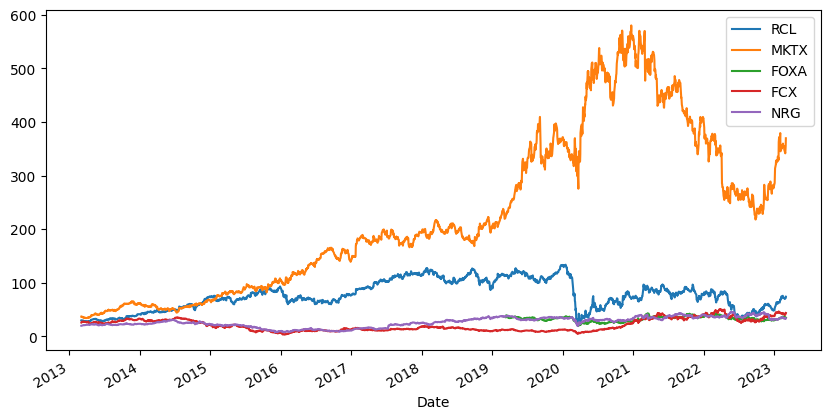

In [22]:
tickers5 = np.random.choice(df_prices.columns, size=5, replace=False)
df_prices[tickers5].plot(figsize=(10,5));

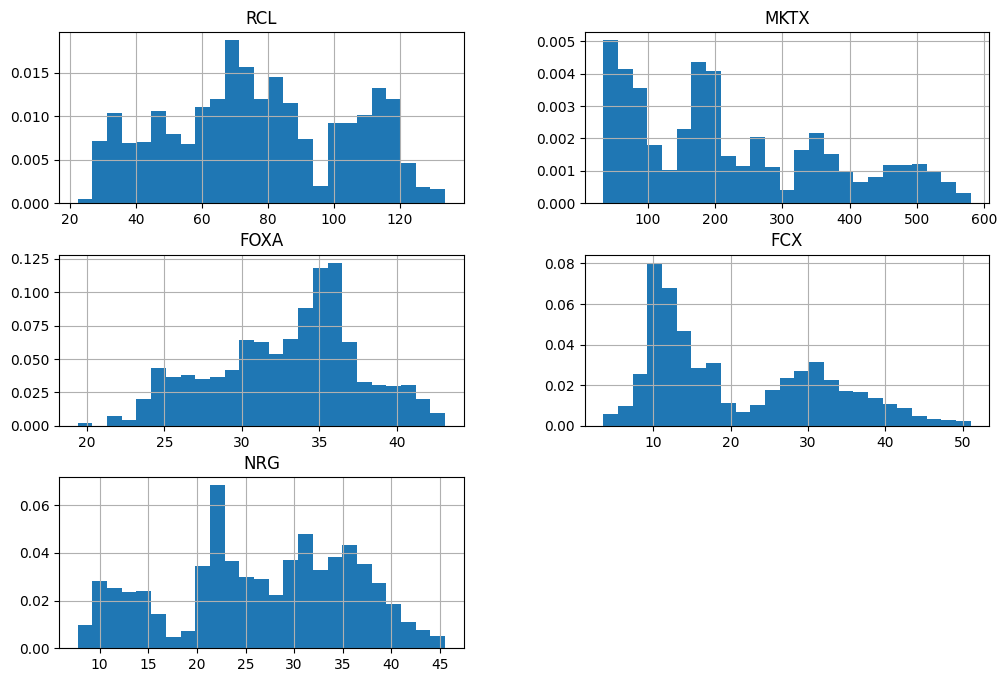

In [23]:
df_prices[tickers5].hist(bins=25, density=True, figsize=(12,8));

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [24]:
df_mn = df_prices[df_prices.index  >= '2022-03-03'].median().reset_index()
df_mn.columns = ['Symbol', 'Price']
df_in = df_inf[['Symbol', 'GICS Sector']]

df_join = pd.merge(df_in, df_mn, left_on='Symbol', right_on='Symbol', how='left')

def q95(x):
    return x.quantile(0.95)

df_join.groupby('GICS Sector')['Price'].agg(q95).sort_values(ascending=False)

GICS Sector
Consumer Discretionary    1763.130005
Health Care                523.568919
Industrials                432.061172
Information Technology     406.481459
Financials                 350.159805
Real Estate                308.903888
Materials                  289.814917
Communication Services     260.003003
Consumer Staples           243.992062
Energy                     165.014986
Utilities                  140.342722
Name: Price, dtype: float64

## 1.2 Риск и доходность

__е) [10 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [25]:
df_r = df_prices.diff()/df_prices.shift(1)
df_r = df_r[1:]
df_r.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533


In [26]:
df_r.shape

(2517, 520)

Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

> __Ответ:__ нет не имеют, как раз из-за выбросов и разнице в хвостах, у доходностей они оказываются более тяжелыми.

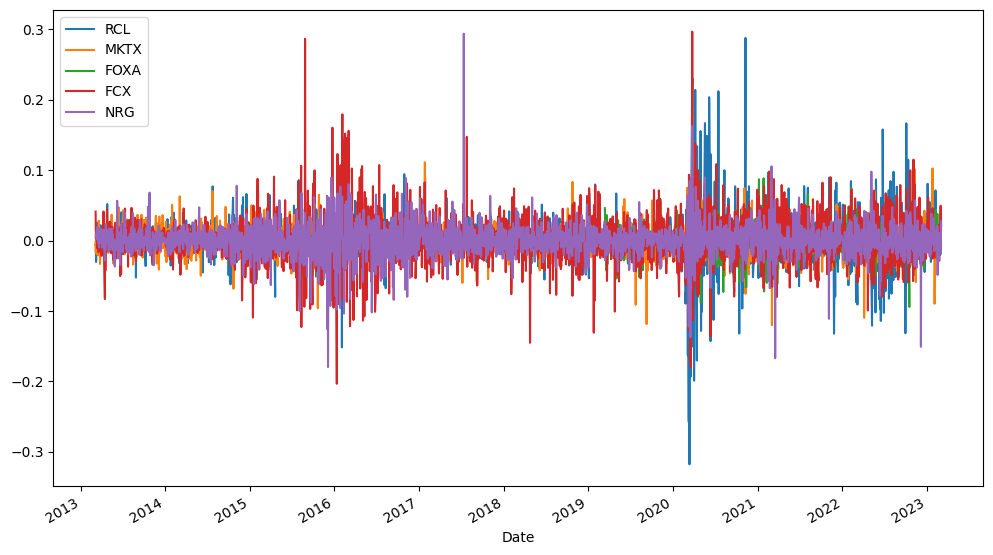

In [27]:
df_r[tickers5].plot(figsize=(12,7));

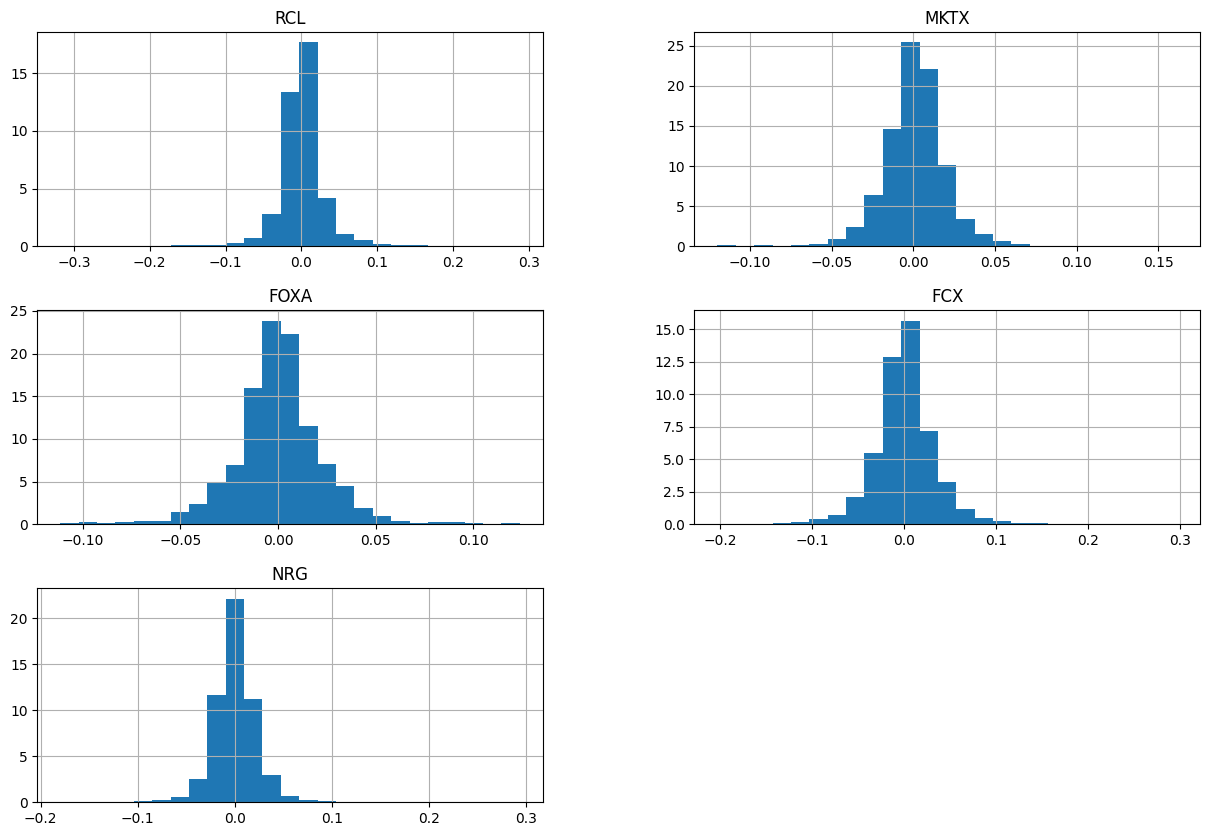

In [28]:
df_r[tickers5].hist(bins=25, density=True, figsize=(15,10));

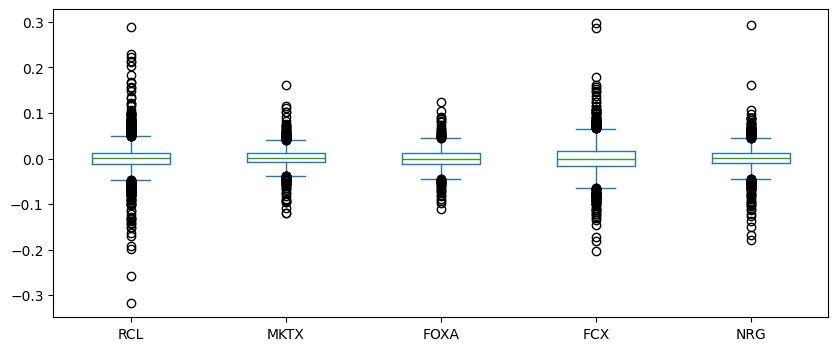

In [29]:
df_r[tickers5].plot(kind='box',figsize=(10,4));

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

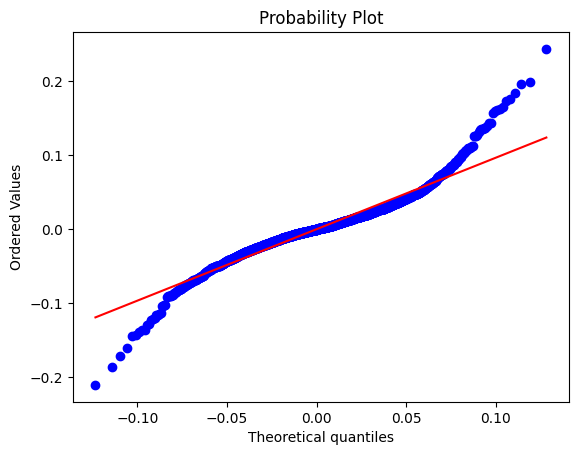

In [30]:
ax = plt.subplot(111)
x = df_r['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [31]:
df_train = df_r[df_r.index  < '2022-03-03']
df_test = df_r[df_r.index  >= '2022-03-03']

In [32]:
df_train.shape

(2265, 520)

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [33]:
R = df_train.mean().sort_values(ascending=False)
R[:10]

CEG     0.006477
LCID    0.004682
MRNA    0.003882
GFS     0.003782
DDOG    0.003149
CARR    0.003140
ENPH    0.002918
ZS      0.002762
TSLA    0.002746
CRWD    0.002606
dtype: float64

In [34]:
R[-10:]

WBD     0.000149
BEN     0.000105
SLB     0.000087
KMI     0.000071
LUMN    0.000060
IBM     0.000060
GE      0.000021
KHC    -0.000037
VTRS   -0.000168
RIVN   -0.005722
dtype: float64

Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [35]:
STD = df_train.std().sort_values(ascending=False)
STD[:10]

RIVN    0.072406
LCID    0.066841
ENPH    0.052601
MRNA    0.052030
PDD     0.045639
ZM      0.042788
GFS     0.041315
SEDG    0.040310
CRWD    0.039878
DDOG    0.039034
dtype: float64

In [36]:
STD[-10:]

COST    0.012303
MMC     0.012117
CL      0.011778
PEP     0.011443
WM      0.011432
RSG     0.011408
PG      0.011339
KO      0.011309
JNJ     0.011255
VZ      0.011099
dtype: float64

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [37]:
# таблица с доходностями и риском
df_result = pd.DataFrame({'std': STD, 'r': R})
df_result.head()

,std,r
A,0.015556,0.000808
AAL,0.031476,0.000579
AAP,0.020050,0.000659
AAPL,0.017579,0.001268
ABBV,0.017331,0.000925


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

> __Ответ:__ левее Теслы есть компания с более высокой доходностью и низким риском. Какая-то `CARR` :) 

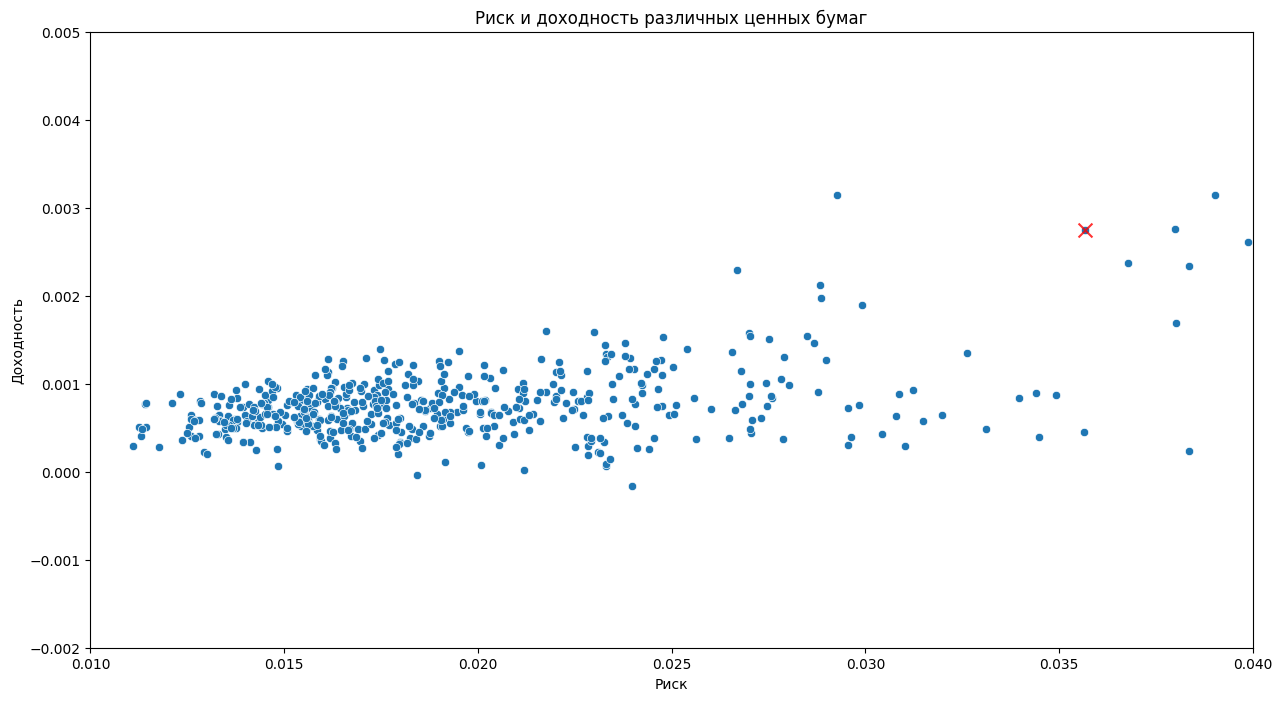

In [38]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=df_result, x='std', y='r')

tsla = df_result.loc['TSLA']
sns.regplot(x=[tsla['std']], y=[tsla['r']], scatter=True, fit_reg=False, 
            marker='x', color='red', scatter_kws={'s':100}) 

plt.ylim(-0.002, 0.005)
plt.xlim(0.01, 0.04)

plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Риск и доходность различных ценных бумаг');

/var/folders/95/tw3zkzk9035_zpzhx2ty33pn4qbhgy/T/ipykernel_16725/3150346906.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(df_result.loc['TSLA'][0], df_result.loc['TSLA'][1])


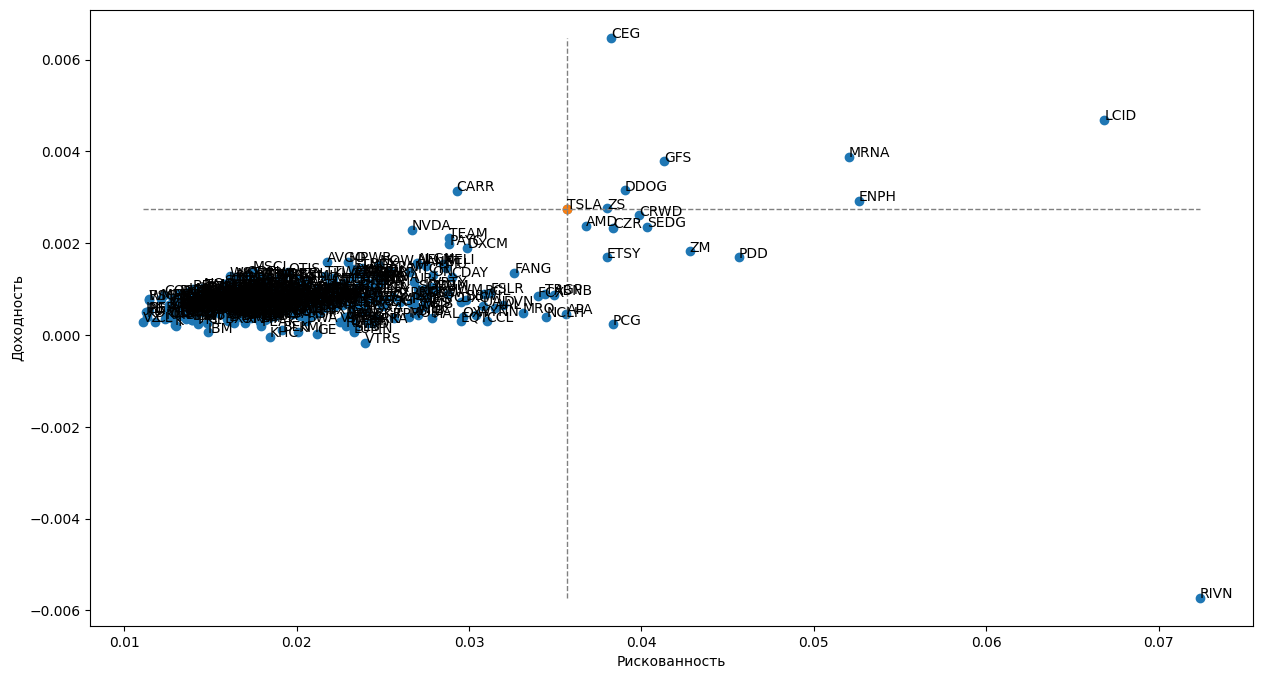

In [54]:
plt.figure(figsize=(15, 8))

plt.scatter(df_result['std'], df_result['r'])

plt.ylabel("Доходность")
plt.xlabel("Рискованность")
plt.scatter(df_result.loc['TSLA'][0], df_result.loc['TSLA'][1])

plt.vlines(df_result.loc['TSLA']['std'], df_result['r'].min(), df_result['r'].max(), color='grey', lw=1, linestyles='--')
plt.hlines(df_result.loc['TSLA']['r'], df_result['std'].min(), df_result['std'].max(), color='grey', lw=1, linestyles='--')

for name in df_result.index:
    plt.annotate(name, (df_result.loc[name]['std'], df_result.loc[name]['r']))
plt.show()

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [10 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [39]:
VaR = -1*df_train.quantile(0.05).sort_values(ascending=True)
VaR[:10]

RIVN    0.106831
LCID    0.075715
ENPH    0.073849
MRNA    0.072876
PDD     0.065768
ZM      0.061953
GFS     0.060479
CEG     0.058496
DDOG    0.056923
SEDG    0.055984
Name: 0.05, dtype: float64

In [41]:
VaR[-10:]

CL     0.016865
VZ     0.016457
SO     0.016385
JNJ    0.015890
PEP    0.015868
MCD    0.015866
RSG    0.015696
KO     0.015495
PG     0.015249
WM     0.015233
Name: VaR, dtype: float64

In [40]:
# добавим получившиеся значения в нашу таблицу
VaR.name = 'VaR'
df_result = df_result.join(VaR)
df_result.head()

,std,r,VaR
A,0.015556,0.000808,0.025164
AAL,0.031476,0.000579,0.044087
AAP,0.020050,0.000659,0.026499
AAPL,0.017579,0.001268,0.025629
ABBV,0.017331,0.000925,0.024926


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

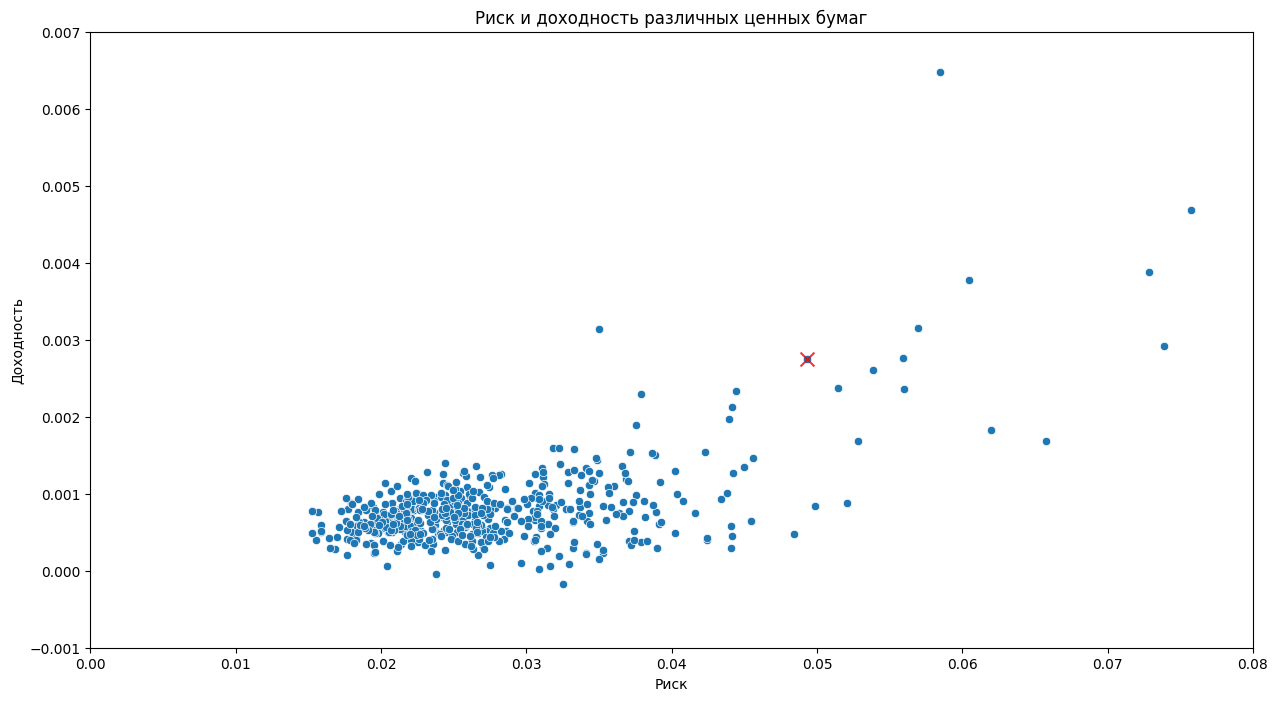

In [42]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=df_result, x='VaR', y='r')

tsla = df_result.loc['TSLA']
sns.regplot(x=[tsla['VaR']], y=[tsla['r']], scatter=True, fit_reg=False, 
            marker='x', color='red', scatter_kws={'s':100}) 

plt.ylim(-0.001, 0.007)
plt.xlim(0, 0.08)

plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Риск и доходность различных ценных бумаг');

$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [43]:
var_tsla = df_train['TSLA'].quantile(0.05)
es_tsla = df_train['TSLA'][df_train['TSLA'] < var_tsla].mean()
loss = es_tsla * 1000

q = df_r['TSLA'].quantile(0.95)
e = df_r['TSLA'][df_r['TSLA'] > q].mean()
profit = e * 1000

Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [44]:
ES = -1*df_train[df_train < df_train.quantile(0.05)].mean()
ES.name = 'ES'
df_result = df_result.join(ES)

In [45]:
df_result.head()

,std,r,VaR,ES
A,0.015556,0.000808,0.025164,0.036676
AAL,0.031476,0.000579,0.044087,0.067565
AAP,0.020050,0.000659,0.026499,0.043459
AAPL,0.017579,0.001268,0.025629,0.039872
ABBV,0.017331,0.000925,0.024926,0.040371


In [46]:
df_result.isnull().sum()

std    0
r      0
VaR    0
ES     0
dtype: int64

In [47]:
df_result = df_result.sort_values('ES', ascending=False).reset_index()

In [48]:
df_result.columns = ['Ticker', 'std', 'r', 'VaR', 'ES']

In [ ]:
df_result.round(3).to_csv('var_result.csv', index=False)

1. Округлите данные до 3-х знаков после запятой `df_result.round(3)`
2. Отсортируйте таблицу `df_result` по колонке `ES` по убыванию
3. Запишите получившиеся результаты в таблицу с колонками `'Ticker', 'std', 'r', 'VaR', 'ES'` в файл `var_result` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми. Порядок колонок должен быть именно таким.
4. Отправьте свой файл `var_result.csv` в контест (https://contest.yandex.ru/contest/47242/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [15 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [49]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

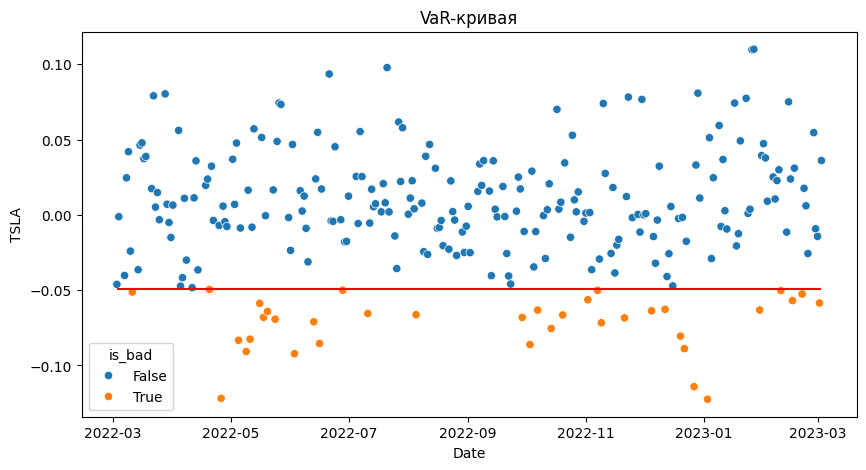

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

> Тут подходит любой способ, как с окном так и с накоплением. Оба засчитываем.

In [61]:
train_date = '2022-03-03'
df_small = df_r['TSLA']
initial_train = df_small.loc[:train_date]
window_size = len(initial_train)

var_result = []
for i in range(window_size, len(df_small)):
    window = df_small.iloc[:i]
    var_tsla_hist = window.quantile(0.05)
    var_result.append((df_small.index[i], var_tsla_hist))

var = pd.DataFrame(var_result, columns=['Date', 'VaR']).set_index('Date')
var.head()

,VaR
Date,
2022-03-07,-0.049282
2022-03-08,-0.049280
2022-03-09,-0.049277
2022-03-10,-0.049275
2022-03-11,-0.049273


<Axes: xlabel='Date'>

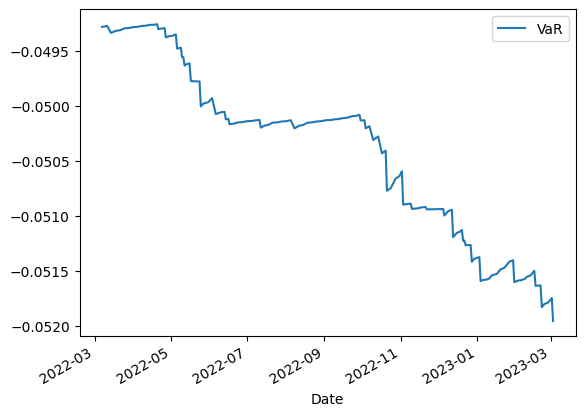

In [62]:
var.plot( )

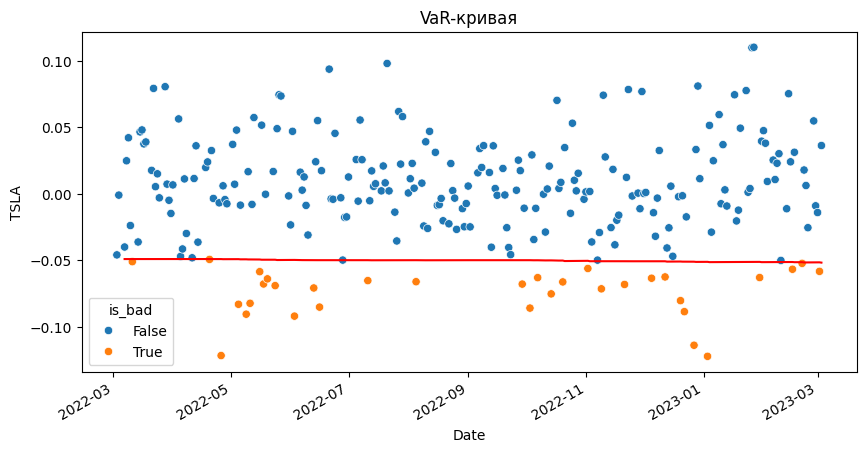

In [74]:
df_tsla = df_test['TSLA'].reset_index().set_index('Date')
df_tsla = df_tsla.join(var).reset_index()
df_tsla['is_bad'] = df_tsla['TSLA'] < df_tsla['VaR']

plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
df_tsla.set_index('Date')['VaR'].plot(color='red')
plt.title('VaR-кривая');

In [75]:
df_tsla['is_bad'].mean() # чет как-то не 5% даже близко, но стало немножко получше :(

0.13095238095238096

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 10 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

In [ ]:
# your code here
# (｡❤‿❤｡)